loading Roboflow workspace...
loading Roboflow project...
Predictions (Original Image) - Model v3: {'predictions': [{'x': 320, 'y': 324, 'width': 640, 'height': 628, 'confidence': 0.8705229759216309, 'class': 'Normal', 'class_id': 2, 'detection_id': '85a22324-4bea-4ee9-bc27-80b57c90f124', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/right_with_eyes_zoomed.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '640'}}
Predictions (Original Image) - Model v6: {'predictions': [{'x': 320.0, 'y': 322.0, 'width': 640.0, 'height': 636.0, 'confidence': 0.6723096370697021, 'class': 'Normal', 'class_id': 2, 'detection_id': 'a151a672-5e30-4c61-a73f-9eabc8a6a932', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/right_with_eyes_zoomed.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '640'}}
Predictions (Enhanced Image) - Model v3: {'predictions': [{'x': 321, 'y': 326, 'width': 638, 'height': 600, 'confidence': 0.7828

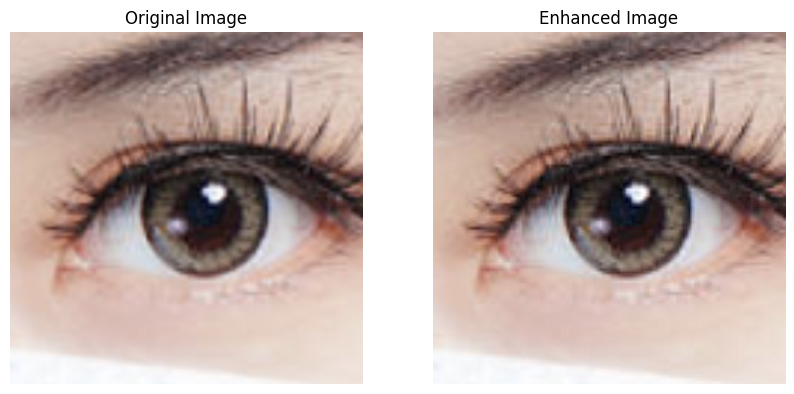

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from PIL import Image

rf = Roboflow(api_key="mJRJtBYRhInoDZPAzrv3")
project = rf.workspace("mongta-swaxu").project("mongta")

# โหลดทั้งสองเวอร์ชันของโมเดล
model_v3 = project.version("3").model
model_v6 = project.version("6").model

def enhance_image(image):
    enhanced = cv2.detailEnhance(image, sigma_s=1, sigma_r=0.15)
    blurred = cv2.GaussianBlur(enhanced, (0, 0), 1.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)
    return sharpened

# กำหนดพาธไฟล์ที่ต้องการ
image_path = "/Users/oattao/Desktop/Mongta-ai/image/right_with_eyes_zoomed.png"

# โหลดและประมวลผลภาพ
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพต้นฉบับ
predictions_original_v3 = model_v3.predict(image_path, confidence=40, overlap=30).json()
predictions_original_v6 = model_v6.predict(image_path, confidence=40, overlap=30).json()

print("Predictions (Original Image) - Model v3:", predictions_original_v3)
print("Predictions (Original Image) - Model v6:", predictions_original_v6)

# ปรับแต่งภาพ
enhanced_image = enhance_image(image)

# แปลงเป็นไฟล์ชั่วคราวเพื่อให้ Roboflow ใช้งาน
resized_image_path = "temp_resized.png"
Image.fromarray(enhanced_image).save(resized_image_path)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพที่ปรับแต่งแล้ว
predictions_enhanced_v3 = model_v3.predict(resized_image_path, confidence=40, overlap=30).json()
predictions_enhanced_v6 = model_v6.predict(resized_image_path, confidence=40, overlap=30).json()

print("Predictions (Enhanced Image) - Model v3:", predictions_enhanced_v3)
print("Predictions (Enhanced Image) - Model v6:", predictions_enhanced_v6)

# แสดงภาพต้นฉบับและภาพที่ปรับแต่ง
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


loading Roboflow workspace...
loading Roboflow project...
Predictions (Original Image) - Model v3: {'predictions': [{'x': 96, 'y': 45, 'width': 89, 'height': 56, 'confidence': 0.8019111156463623, 'class': 'Cataract', 'class_id': 0, 'detection_id': 'bfdd9367-f3dc-4fd4-9819-f9d17f4bd74b', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/380x260.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '380', 'height': '260'}}
Predictions (Original Image) - Model v6: {'predictions': [{'x': 162.0, 'y': 112.5, 'width': 148.0, 'height': 133.0, 'confidence': 0.7745526432991028, 'class': 'Cataract', 'class_id': 0, 'detection_id': 'be0e0bcf-9dbe-40db-9f24-6ca256383fcf', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/380x260.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '380', 'height': '260'}}
Predictions (Enhanced Image) - Model v3: {'predictions': [{'x': 97, 'y': 45, 'width': 78, 'height': 52, 'confidence': 0.8334815502166748, 'class': 'Cataract',

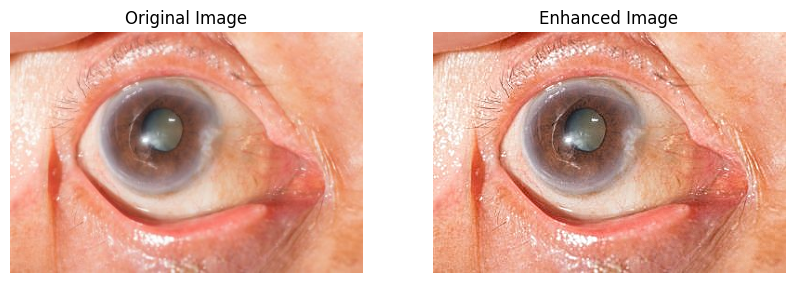

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from PIL import Image

rf = Roboflow(api_key="mJRJtBYRhInoDZPAzrv3")
project = rf.workspace("mongta-swaxu").project("mongta")

# โหลดทั้งสองเวอร์ชันของโมเดล
model_v3 = project.version("3").model
model_v6 = project.version("6").model

def enhance_image(image):
    enhanced = cv2.detailEnhance(image, sigma_s=1, sigma_r=0.15)
    blurred = cv2.GaussianBlur(enhanced, (0, 0), 1.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)
    return sharpened

# กำหนดพาธไฟล์ที่ต้องการ
image_path = "/Users/oattao/Desktop/Mongta-ai/image/380x260.jpg"

# โหลดและประมวลผลภาพ
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพต้นฉบับ
predictions_original_v3 = model_v3.predict(image_path, confidence=40, overlap=30).json()
predictions_original_v6 = model_v6.predict(image_path, confidence=40, overlap=30).json()

print("Predictions (Original Image) - Model v3:", predictions_original_v3)
print("Predictions (Original Image) - Model v6:", predictions_original_v6)

# ปรับแต่งภาพ
enhanced_image = enhance_image(image)

# แปลงเป็นไฟล์ชั่วคราวเพื่อให้ Roboflow ใช้งาน
resized_image_path = "temp_resized.png"
Image.fromarray(enhanced_image).save(resized_image_path)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพที่ปรับแต่งแล้ว
predictions_enhanced_v3 = model_v3.predict(resized_image_path, confidence=40, overlap=30).json()
predictions_enhanced_v6 = model_v6.predict(resized_image_path, confidence=40, overlap=30).json()

print("Predictions (Enhanced Image) - Model v3:", predictions_enhanced_v3)
print("Predictions (Enhanced Image) - Model v6:", predictions_enhanced_v6)

# แสดงภาพต้นฉบับและภาพที่ปรับแต่ง
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


loading Roboflow workspace...
loading Roboflow project...
Predictions (Original Image) - Model v3: {'predictions': [{'x': 61, 'y': 26, 'width': 42, 'height': 12, 'confidence': 0.7549977898597717, 'class': 'Conjunctivitis', 'class_id': 1, 'detection_id': '5be6ec44-4ffa-4e82-948f-8f8cd78e9c40', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/download.jpeg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '275', 'height': '183'}}
Predictions (Original Image) - Model v6: {'predictions': [{'x': 170.0, 'y': 90.0, 'width': 46.0, 'height': 44.0, 'confidence': 0.6323404312133789, 'class': 'Cataract', 'class_id': 0, 'detection_id': 'e63e09d3-239b-47c7-a47a-01127801a8a5', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/download.jpeg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '275', 'height': '183'}}
Predictions (Enhanced Image) - Model v3: {'predictions': [{'x': 61, 'y': 26, 'width': 42, 'height': 11, 'confidence': 0.7829538583755493, 'class': 'Con

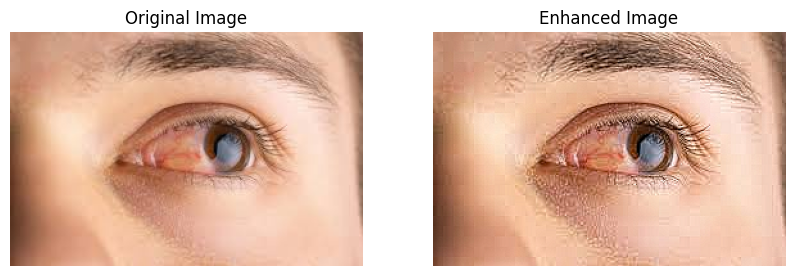

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from PIL import Image

rf = Roboflow(api_key="mJRJtBYRhInoDZPAzrv3")
project = rf.workspace("mongta-swaxu").project("mongta")

# โหลดทั้งสองเวอร์ชันของโมเดล
model_v3 = project.version("3").model
model_v6 = project.version("6").model

def enhance_image(image):
    enhanced = cv2.detailEnhance(image, sigma_s=1, sigma_r=0.15)
    blurred = cv2.GaussianBlur(enhanced, (0, 0), 1.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)
    return sharpened

# กำหนดพาธไฟล์ที่ต้องการ
image_path = "/Users/oattao/Desktop/Mongta-ai/image/download.jpeg"

# โหลดและประมวลผลภาพ
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพต้นฉบับ
predictions_original_v3 = model_v3.predict(image_path, confidence=40, overlap=30).json()
predictions_original_v6 = model_v6.predict(image_path, confidence=40, overlap=30).json()

print("Predictions (Original Image) - Model v3:", predictions_original_v3)
print("Predictions (Original Image) - Model v6:", predictions_original_v6)

# ปรับแต่งภาพ
enhanced_image = enhance_image(image)

# แปลงเป็นไฟล์ชั่วคราวเพื่อให้ Roboflow ใช้งาน
resized_image_path = "temp_resized.png"
Image.fromarray(enhanced_image).save(resized_image_path)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพที่ปรับแต่งแล้ว
predictions_enhanced_v3 = model_v3.predict(resized_image_path, confidence=40, overlap=30).json()
predictions_enhanced_v6 = model_v6.predict(resized_image_path, confidence=40, overlap=30).json()

print("Predictions (Enhanced Image) - Model v3:", predictions_enhanced_v3)
print("Predictions (Enhanced Image) - Model v6:", predictions_enhanced_v6)

# แสดงภาพต้นฉบับและภาพที่ปรับแต่ง
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


loading Roboflow workspace...
loading Roboflow project...
Predictions (Original Image) - Model v3: {'predictions': [{'x': 36, 'y': 36, 'width': 57, 'height': 22, 'confidence': 0.7356058955192566, 'class': 'Stye', 'class_id': 4, 'detection_id': '137a55fd-322a-45f9-b9e4-e12fb2433ef1', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/1.jpeg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '275', 'height': '183'}}
Predictions (Original Image) - Model v6: {'predictions': [{'x': 90.5, 'y': 126.5, 'width': 113.0, 'height': 77.0, 'confidence': 0.7437232732772827, 'class': 'Stye', 'class_id': 4, 'detection_id': '1717020a-5a06-4dbd-95f1-a5b5907e0d97', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/1.jpeg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '275', 'height': '183'}}
Predictions (Enhanced Image) - Model v3: {'predictions': [{'x': 37, 'y': 37, 'width': 49, 'height': 20, 'confidence': 0.6577063798904419, 'class': 'Stye', 'class_id': 4, 'detecti

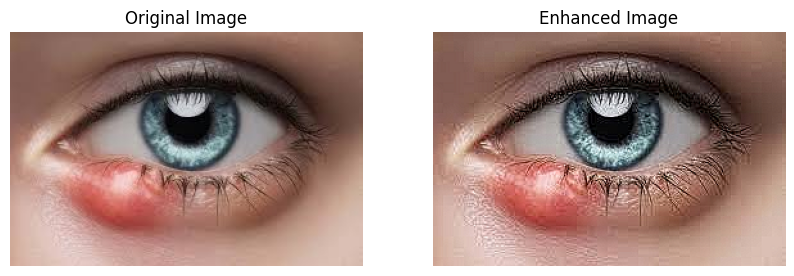

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from PIL import Image

rf = Roboflow(api_key="mJRJtBYRhInoDZPAzrv3")
project = rf.workspace("mongta-swaxu").project("mongta")

# โหลดทั้งสองเวอร์ชันของโมเดล
model_v3 = project.version("3").model
model_v6 = project.version("6").model

def enhance_image(image):
    enhanced = cv2.detailEnhance(image, sigma_s=1, sigma_r=0.15)
    blurred = cv2.GaussianBlur(enhanced, (0, 0), 1.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)
    return sharpened

# กำหนดพาธไฟล์ที่ต้องการ
image_path = "/Users/oattao/Desktop/Mongta-ai/image/1.jpeg"

# โหลดและประมวลผลภาพ
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพต้นฉบับ
predictions_original_v3 = model_v3.predict(image_path, confidence=40, overlap=30).json()
predictions_original_v6 = model_v6.predict(image_path, confidence=40, overlap=30).json()

print("Predictions (Original Image) - Model v3:", predictions_original_v3)
print("Predictions (Original Image) - Model v6:", predictions_original_v6)

# ปรับแต่งภาพ
enhanced_image = enhance_image(image)

# แปลงเป็นไฟล์ชั่วคราวเพื่อให้ Roboflow ใช้งาน
resized_image_path = "temp_resized.png"
Image.fromarray(enhanced_image).save(resized_image_path)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพที่ปรับแต่งแล้ว
predictions_enhanced_v3 = model_v3.predict(resized_image_path, confidence=40, overlap=30).json()
predictions_enhanced_v6 = model_v6.predict(resized_image_path, confidence=40, overlap=30).json()

print("Predictions (Enhanced Image) - Model v3:", predictions_enhanced_v3)
print("Predictions (Enhanced Image) - Model v6:", predictions_enhanced_v6)

# แสดงภาพต้นฉบับและภาพที่ปรับแต่ง
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


loading Roboflow workspace...
loading Roboflow project...
Predictions (Original Image) - Model v3: {'predictions': [{'x': 49, 'y': 29, 'width': 96, 'height': 52, 'confidence': 0.8494713306427002, 'class': 'Conjunctivitis', 'class_id': 1, 'detection_id': '86d8023e-69d0-4d15-bf8b-1b28dca662e4', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/images.jpeg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '251', 'height': '201'}}
Predictions (Original Image) - Model v6: {'predictions': [{'x': 127.5, 'y': 67.5, 'width': 247.0, 'height': 135.0, 'confidence': 0.7712859511375427, 'class': 'Conjunctivitis', 'class_id': 1, 'detection_id': '6d057990-0ace-4eb8-a6a1-f5f96b86e8bf', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/images.jpeg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '251', 'height': '201'}}
Predictions (Enhanced Image) - Model v3: {'predictions': [{'x': 50, 'y': 29, 'width': 96, 'height': 53, 'confidence': 0.8565012216567993, 'class': 

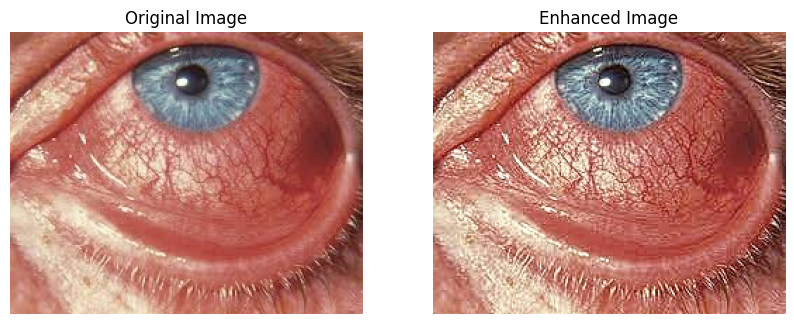

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from PIL import Image

rf = Roboflow(api_key="mJRJtBYRhInoDZPAzrv3")
project = rf.workspace("mongta-swaxu").project("mongta")

# โหลดทั้งสองเวอร์ชันของโมเดล
model_v3 = project.version("3").model
model_v6 = project.version("6").model

def enhance_image(image):
    enhanced = cv2.detailEnhance(image, sigma_s=1, sigma_r=0.15)
    blurred = cv2.GaussianBlur(enhanced, (0, 0), 1.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)
    return sharpened

# กำหนดพาธไฟล์ที่ต้องการ
image_path = "/Users/oattao/Desktop/Mongta-ai/image/images.jpeg"

# โหลดและประมวลผลภาพ
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพต้นฉบับ
predictions_original_v3 = model_v3.predict(image_path, confidence=40, overlap=30).json()
predictions_original_v6 = model_v6.predict(image_path, confidence=40, overlap=30).json()

print("Predictions (Original Image) - Model v3:", predictions_original_v3)
print("Predictions (Original Image) - Model v6:", predictions_original_v6)

# ปรับแต่งภาพ
enhanced_image = enhance_image(image)

# แปลงเป็นไฟล์ชั่วคราวเพื่อให้ Roboflow ใช้งาน
resized_image_path = "temp_resized.png"
Image.fromarray(enhanced_image).save(resized_image_path)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพที่ปรับแต่งแล้ว
predictions_enhanced_v3 = model_v3.predict(resized_image_path, confidence=40, overlap=30).json()
predictions_enhanced_v6 = model_v6.predict(resized_image_path, confidence=40, overlap=30).json()

print("Predictions (Enhanced Image) - Model v3:", predictions_enhanced_v3)
print("Predictions (Enhanced Image) - Model v6:", predictions_enhanced_v6)

# แสดงภาพต้นฉบับและภาพที่ปรับแต่ง
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


loading Roboflow workspace...
loading Roboflow project...
Predictions (Original Image) - Model v3: {'predictions': [{'x': 583, 'y': 360, 'width': 162, 'height': 120, 'confidence': 0.48935040831565857, 'class': 'Normal', 'class_id': 2, 'detection_id': 'b682cdb5-2130-4b04-845b-5a11892dd06d', 'image_path': '/Users/oattao/Desktop/Mongta-ai/image/left.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '760', 'height': '754'}}
Predictions (Original Image) - Model v6: {'predictions': [], 'image': {'width': '760', 'height': '754'}}
Predictions (Enhanced Image) - Model v3: {'predictions': [{'x': 585, 'y': 361, 'width': 133, 'height': 60, 'confidence': 0.5157103538513184, 'class': 'Conjunctivitis', 'class_id': 1, 'detection_id': '706ebc6a-c88d-4221-9b14-2de92fe7e577', 'image_path': 'temp_resized.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '760', 'height': '754'}}
Predictions (Enhanced Image) - Model v6: {'predictions': [], 'image': {'width': '760', 'h

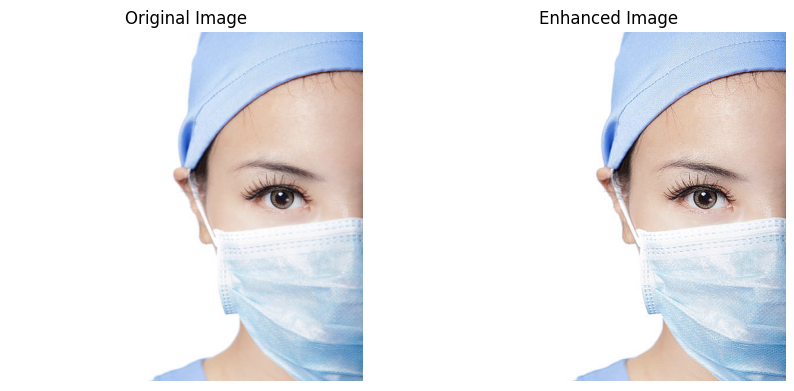

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from PIL import Image

rf = Roboflow(api_key="mJRJtBYRhInoDZPAzrv3")
project = rf.workspace("mongta-swaxu").project("mongta")

# โหลดทั้งสองเวอร์ชันของโมเดล
model_v3 = project.version("3").model
model_v6 = project.version("6").model

def enhance_image(image):
    enhanced = cv2.detailEnhance(image, sigma_s=1, sigma_r=0.15)
    blurred = cv2.GaussianBlur(enhanced, (0, 0), 1.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, blurred, -0.5, 0)
    return sharpened

# กำหนดพาธไฟล์ที่ต้องการ
image_path = "/Users/oattao/Desktop/Mongta-ai/image/left.png"

# โหลดและประมวลผลภาพ
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพต้นฉบับ
predictions_original_v3 = model_v3.predict(image_path, confidence=40, overlap=30).json()
predictions_original_v6 = model_v6.predict(image_path, confidence=40, overlap=30).json()

print("Predictions (Original Image) - Model v3:", predictions_original_v3)
print("Predictions (Original Image) - Model v6:", predictions_original_v6)

# ปรับแต่งภาพ
enhanced_image = enhance_image(image)

# แปลงเป็นไฟล์ชั่วคราวเพื่อให้ Roboflow ใช้งาน
resized_image_path = "temp_resized.png"
Image.fromarray(enhanced_image).save(resized_image_path)

# ใช้โมเดลเวอร์ชัน 3 และ 6 ทำการพยากรณ์กับภาพที่ปรับแต่งแล้ว
predictions_enhanced_v3 = model_v3.predict(resized_image_path, confidence=40, overlap=30).json()
predictions_enhanced_v6 = model_v6.predict(resized_image_path, confidence=40, overlap=30).json()

print("Predictions (Enhanced Image) - Model v3:", predictions_enhanced_v3)
print("Predictions (Enhanced Image) - Model v6:", predictions_enhanced_v6)

# แสดงภาพต้นฉบับและภาพที่ปรับแต่ง
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()
